<a href="https://colab.research.google.com/github/Cliff12001/IMSE-441/blob/main/IMSE441_Midterm_1_(CR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMSE 441 MIDTERM 1**

- Please rename the file as 'IMSE441_Midterm_1_(your initials)
- Complete your exam and upload the google colab code link as a submission
- Use whatever material you have as a reference when solving but please dont discuss with friends or simply copy without logic
- Total exam is 100 marks, of which 30points for in class exam and 70 marks is takehome for coding
- Of the 70 marks of coding, **5 points** will be awarded for writing the code in a well organized manner like **headings** and **# comments or interpretation of what you are doing in the code**. Make sure all graphs or pvalues have interpretation.

- ***Hint:*** If sample size of dataframe is already small, i.e. <=30, you **dont** need to create a smaller dataframe to perform t-test. 

**ALL THE VERY BEST!**

In [ ]:
#basic
import pandas as pd
import numpy as np

#statistic 
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt
%pip install pingouin
import pingouin as pg
from scipy.stats import expon
from scipy.stats import randint
from scipy.stats import binom 
from scipy.stats import hypergeom
from scipy.stats import norm

### **Question1:** (20 points)
a) Choose a discrete and continuous distribution of your choice, generate random samples and find their mean, variance and standard deviation. 

b)Plot pmf/pdf and cdf of both the distributions.

c)What is the difference between pmf and pdf?

a.

Discrete Distribution

In [109]:
[M, n, N] = [20, 8, 13]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_balls = rv.pmf(x)

In [112]:
ball_cdf = hypergeom.cdf(x, M, n, N)
ball_cdf

array([0.00000000e+00, 1.03199174e-04, 4.43756450e-03, 5.21155831e-02,
       2.50773994e-01, 6.08359133e-01, 8.94427245e-01, 9.89783282e-01,
       1.00000000e+00])

In [114]:
mean2, var2 = hypergeom.stats(M, n, N, loc=0)
print('mean is', mean2, 'and variance is', var2)

mean is 5.2 and variance is 1.1494736842105264


Continuous Distribution

In [80]:
x=expon.rvs(scale=1/20,size=40)
x

array([0.00029852, 0.02603037, 0.00864383, 0.04439812, 0.00574203,
       0.05050878, 0.11336192, 0.0194564 , 0.03286317, 0.01781542,
       0.00073344, 0.01332359, 0.01388976, 0.02188304, 0.14669339,
       0.04520028, 0.00340981, 0.04190925, 0.04579536, 0.01928364,
       0.13910625, 0.08244183, 0.06132326, 0.05405403, 0.14662384,
       0.05254261, 0.12403666, 0.00294054, 0.07990192, 0.0088291 ,
       0.07698622, 0.15458968, 0.02254157, 0.02548404, 0.06103353,
       0.03257822, 0.04639519, 0.03422153, 0.01190778, 0.03487189])

In [81]:
m, v, s = expon.mean(scale=1/20), expon.var(scale=1/20), expon.std(scale=1/20)
print('mean = ', m, 'Variance = ', v, 'Standard Deviation =', s)

mean =  0.05 Variance =  0.0025000000000000005 Standard Deviation = 0.05


b.

Discrete

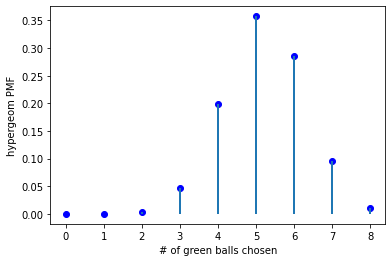

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_balls, 'bo')
ax.vlines(x, 0, pmf_balls, lw=2)
ax.set_xlabel('# of green balls chosen')
ax.set_ylabel('hypergeom PMF')
plt.show()

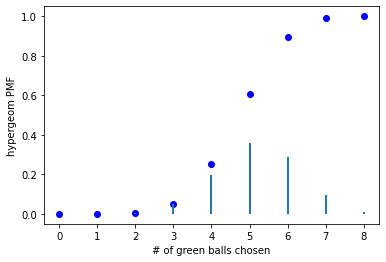

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, ball_cdf, 'bo')
ax.vlines(x, 0, pmf_balls, lw=2)
ax.set_xlabel('# of green balls chosen')
ax.set_ylabel('hypergeom PMF')
plt.show()

Continuous

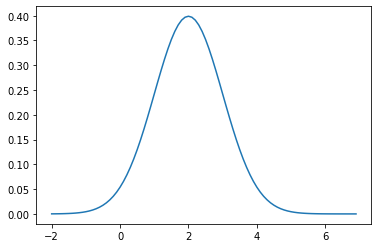

In [143]:
x=np.arange(-2,7,0.1)
plt.plot(x,norm.pdf(x,2,1))
plt.show()

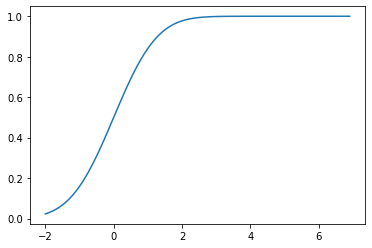

In [144]:
plt.plot(x,norm.cdf(x,0,1))
plt.show()

c.

pmf is probability mass function and it is for discrete probability distributions. Where as pdf is probability density function and is used for continuous probability distributions.

### **Question2:** (30 points)
a) Import the data "OTT_platform_data.csv" and perform data cleaning, descriptive statistics on the  dataset to generate clean data

b) How many people watch Netflix and how many watch prime? What is the mean time spent on both the platforms. 

c) Plot a pie chart to answer the question: Based on the dataset do people like Netflix or prime more?

d) Construct a boxplot to see variability of time data on both the platforms. From the plot, determine an approximate median value each platform

a.

In [ ]:
OTT=pd.read_csv('/content/drive/MyDrive/OTT_platform_data.csv')
OTT

In [33]:
OTT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  23 non-null     object 
 1   Time      22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


b.

11 People are watching Amazon Prime and 12 people are watching netflix

In [40]:
g = OTT.groupby('Platform')['Time'].mean()
g

Platform
Amazon Prime    1.645000
Netflix         1.264545
Name: Time, dtype: float64

c.

<AxesSubplot:ylabel='None'>

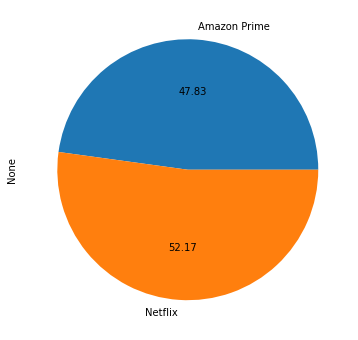

In [4]:
g = OTT.groupby('Platform').size()
g.plot(kind = 'pie', autopct='%.2f', figsize = (10,6) )

People prefer to use the netflix platform slightly more than the Amazon Prime platform.

d.

In [22]:
AmazonPrime=(OTT[OTT['Platform']=='Amazon Prime']['Time'])
AmazonPrime

1     2.53
3     0.71
5     0.85
7     2.46
9     1.49
13    3.33
15    1.87
17    1.26
19    0.48
21    1.47
23     NaN
Name: Time, dtype: float64

In [23]:
Netflix=(OTT[OTT['Platform']=='Netflix']['Time'])
Netflix

0     0.21
2     0.35
4     0.67
6      NaN
8     1.32
10    0.68
12    3.21
14    1.47
16    0.95
18    0.45
20    1.18
22    3.42
Name: Time, dtype: float64

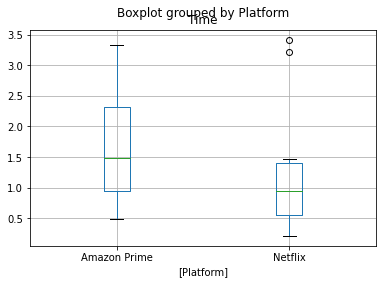

In [8]:
OTT.boxplot(column=['Time'], by=['Platform']);

In [42]:
g = OTT.groupby('Platform')['Time'].median()
g

Platform
Amazon Prime    1.48
Netflix         0.95
Name: Time, dtype: float64

### **Question3:** (15 points)
a) Perform tests to check the distribution of 'Time' data in OTT_platform_data.csv before you can do t-test. Check eligibility and interpret your results.

b) Does the given data satisfy the criteria for t-testing eligibility? If so,perform t-test to see if 0.83 is an acceptable mean based on 99% significance level. Then create a 99% CI on the unknown mean value of 'Time'

c) Is it one sided or two sided CI?

d) What is the degree of freedom value for the test?

e) Calculate df['Time'].mean(), is it the actual mean or sample mean?

In [ ]:
OTT=pd.read_csv('/content/drive/MyDrive/OTT_platform_data.csv')
OTT

In [29]:
OTT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  23 non-null     object 
 1   Time      22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


In [51]:
OTT.isnull().sum() 

Platform    1
Time        2
dtype: int64

In [53]:
OTT = OTT.dropna()
OTT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  21 non-null     object 
 1   Time      21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


a.

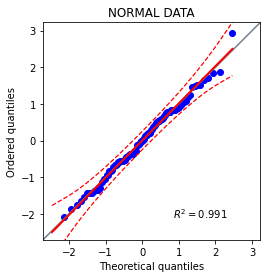

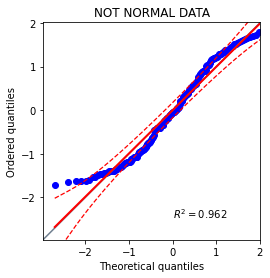

Text(0.5, 1.0, 'OUR DATA')

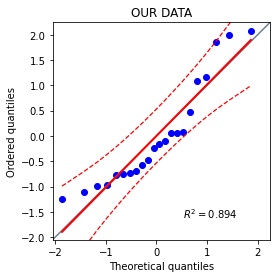

In [45]:
plt.show()
data = np.random.normal(0, 1, 100)  
pg.qqplot(data).set_title('NORMAL DATA')

#not normally dist
plt.show()
data = np.random.uniform(0,7,200)
pg.qqplot(data).set_title('NOT NORMAL DATA')

#lets test our data
plt.show()            
pg.qqplot(OTT['Time']).set_title('OUR DATA')

The disrtibution of the data set is within the range of normal disrtibution, therefore it is normal distribution. 

b.

In [58]:
#Hypothesis testing for normality
print(stats.normaltest(OTT['Time']))

NormaltestResult(statistic=2.9693617401687833, pvalue=0.22657463588450225)


In [63]:
stats.ttest_1samp(OTT['Time'],.83)

TtestResult(statistic=2.817958669950323, pvalue=0.010626190992228224, df=20)

0.83 is an acceptable mean, due to the pvalue of 0.01063 which is < 0.05

In [66]:
CI= stats.ttest_1samp(OTT['Time'],0.83).confidence_interval(confidence_level=0.9)
CI

ConfidenceInterval(low=1.0688692764803176, high=1.8225592949482536)

c.

This is a two sided confidence interval.

d.

In [67]:
len(OTT)

21

e.

In [68]:
OTT['Time'].mean()

1.4457142857142857

This is the actual mean of the data